# Homework3

## Problem 1: Logistic Regression

### 1

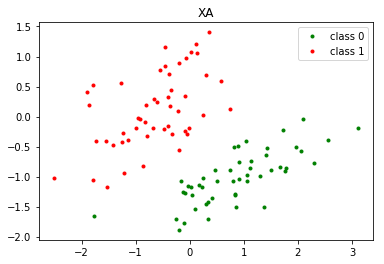

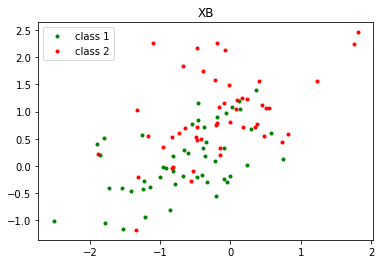

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

iris = np.genfromtxt("data/iris.txt",delimiter=None)
X, Y = iris[:,0:2], iris[:,-1]
X,Y  = ml.shuffleData(X,Y)
X,_  = ml.rescale(X)

XA, YA = X[Y < 2, :], Y[Y < 2]
XB, YB = X[Y > 0, :], Y[Y > 0]

plt.plot(XA[YA==0,0],XA[YA==0,1],'.',color='g',label = 'class 0')
plt.legend()
plt.plot(XA[YA==1,0],XA[YA==1,1],'.',color='r',label='class 1')
plt.legend()
plt.title('XA')
plt.show()
plt.plot(XB[YB==1,0],XB[YB==1,1],'.',color='g',label='class 1')
plt.legend()
plt.plot(XB[YB==2,0],XB[YB==2,1],'.',color='r',label='class 2')
plt.legend()
plt.title('XB')
plt.show()

### 2

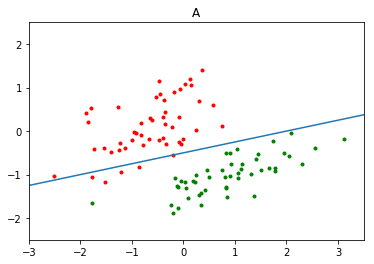

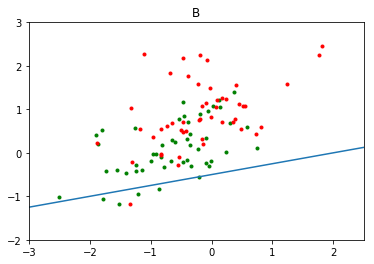

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from logisticClassify2 import *
iris = np.genfromtxt("data/iris.txt", delimiter = None)

X, Y = iris[:,0:2], iris[:,-1]
X,Y  = ml.shuffleData(X,Y)
X,_  = ml.rescale(X)

XA, YA = X[Y < 2, :], Y[Y < 2]
XB, YB = X[Y > 0, :], Y[Y > 0]

learner = logisticClassify2()
wts =np.array( [0.5,-0.25,1])
learner.theta = wts

learner.plotBoundary(XA, YA)
plt.axis([-3,3.5,-2.5,2.5])
plt.title('A')
plt.show()

learner.plotBoundary(XB, YB)
plt.axis([-3,2.5,-2,3])
plt.title('B')
plt.show()

In [2]:
def plotBoundary(self,X,Y):
    if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
    K = np.unique(Y)
    X1 = np.linspace(min(X[:,0]), max(X[:,0]), 200)
    Y1 = -(self.theta[1]/self.theta[2])*X1-self.theta[0]/self.theta[2]
    plt.plot(X[Y==K[0],0],X[Y==K[0],1],'.',color='g')
    plt.plot(X[Y==K[1],0],X[Y==K[1],1],'.',color='r')
    plt.plot(X1, Y1)

### 3

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from logisticClassify2 import *
iris = np.genfromtxt("data/iris.txt", delimiter = None)

X, Y = iris[:,0:2], iris[:,-1]
X,Y  = ml.shuffleData(X,Y)
X,_  = ml.rescale(X)

XA, YA = X[Y < 2, :], Y[Y < 2]
XB, YB = X[Y > 0, :], Y[Y > 0]

learner = logisticClassify2()
learner.classes = np.unique(YA)
wts = np.array([0.5,-0.25,1])
learner.theta = wts; 

print("error rate for A = ",learner.err(XA, YA))

learner.classes = np.unique(YB)
print("error rate for B = ",learner.err(XB, YB))

error rate for A =  0.050505050505050504
error rate for B =  0.46464646464646464


In [12]:
def predict(self, X):
    """ Return the predictied class of each data point in X"""
    Yhat = np.zeros(X.shape[0]);
    for i in range(X.shape[0]):
        r = self.theta[0] + self.theta[1]*X[i,0]+ self.theta[2]*X[i,1]
        if r > 0:
            Yhat[i] = self.classes[1]
        else:
            Yhat[i] = self.classes[0]
    return Yhat

### 4

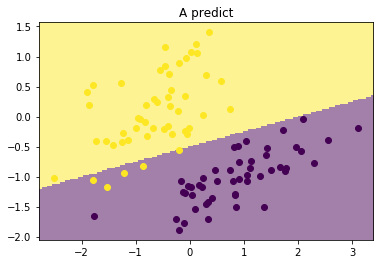

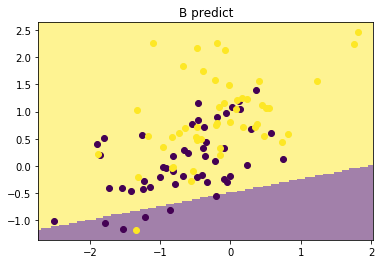

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from logisticClassify2 import *
iris = np.genfromtxt("data/iris.txt", delimiter = None)

Y = iris[: , -1]
X = iris[: ,0: 2]
X,Y = ml.shuffleData(X, Y)
X, _ = ml.transforms.rescale(X)
XA, YA = X[Y < 2, :], Y[Y < 2]
XB, YB = X[Y > 0, :], Y[Y > 0]

learner = logisticClassify2()
wts =[0.5,-0.25,1]
learner.theta = wts

learner.classes = np.unique(YA)
ml.plotClassify2D(learner, XA, YA)
plt.title('A predict')
plt.show()

learner.classes = np.unique(YB)
ml.plotClassify2D(learner, XB, YB)
plt.title('B predict')
plt.show()

### 5

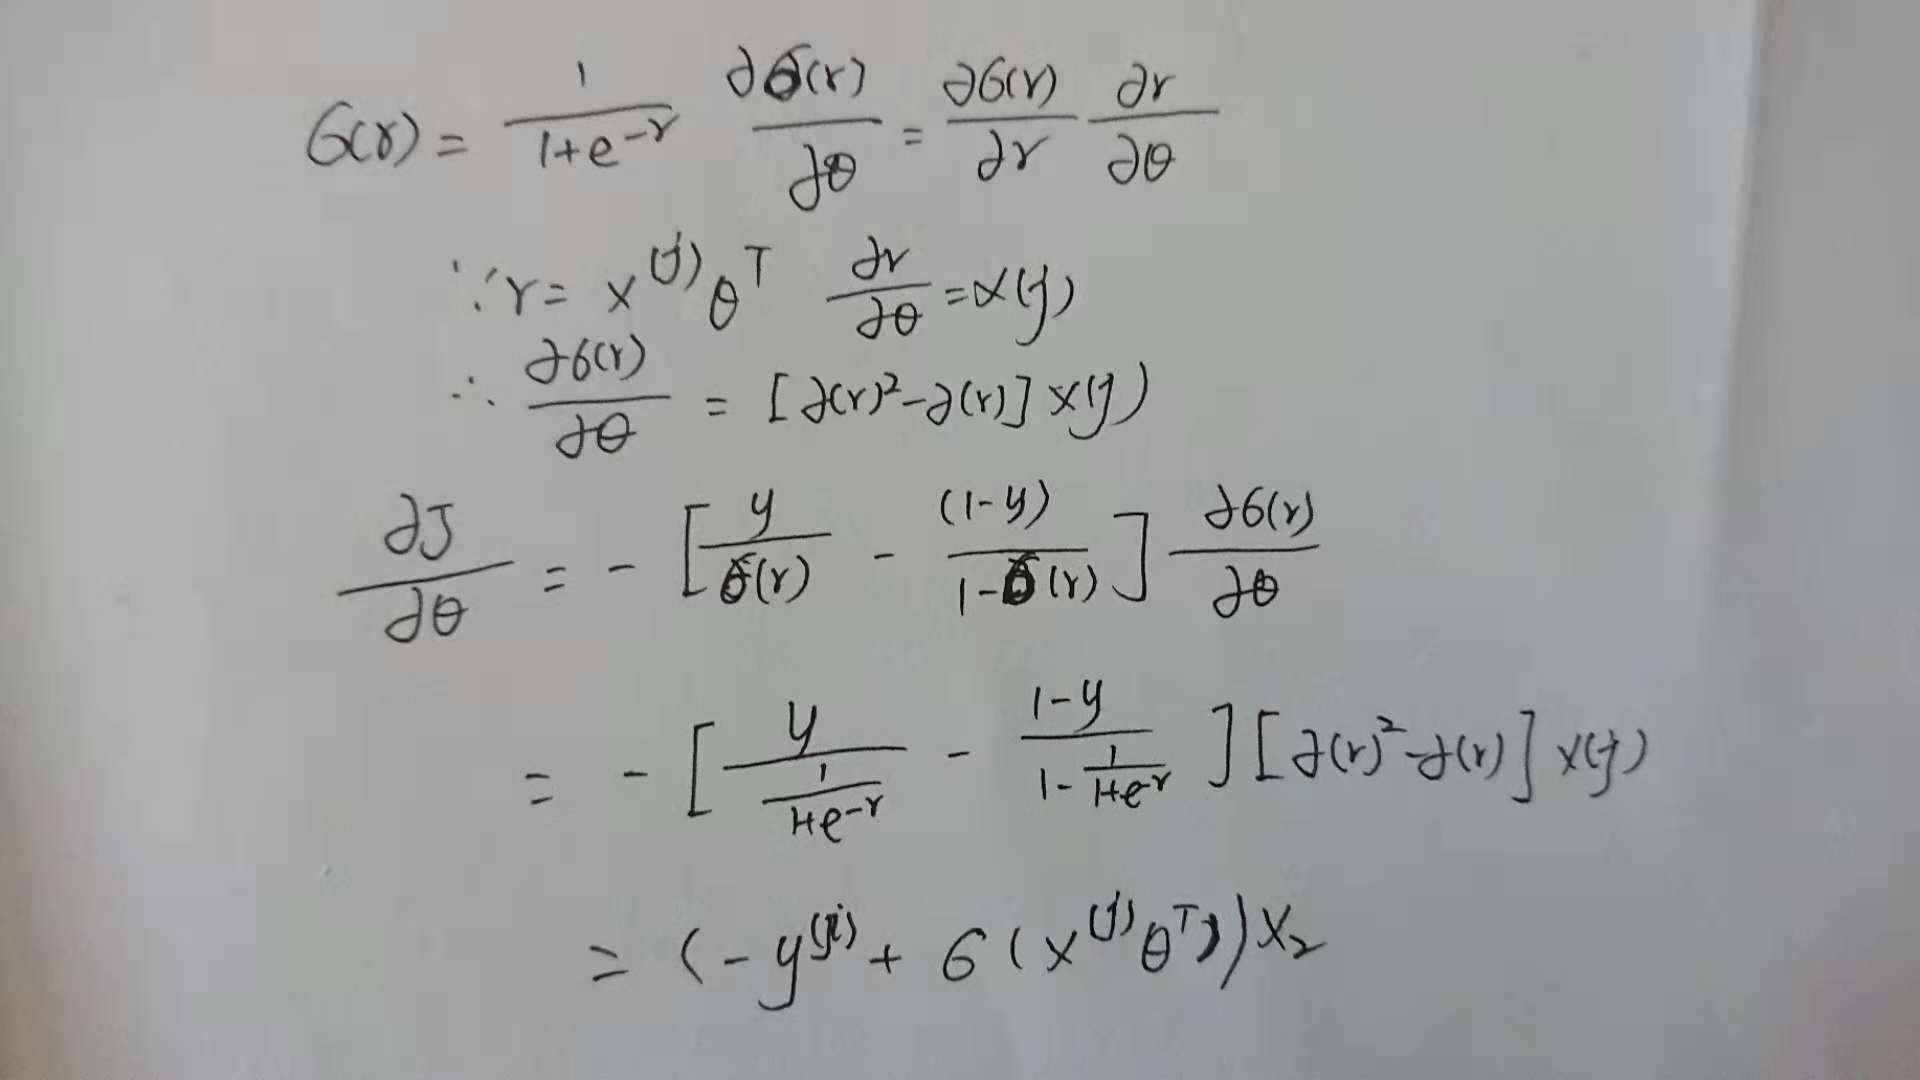

In [3]:
from PIL import Image 
im = Image.open("c.jpg") 
im

### 6

In [ ]:
def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri = np.dot(self.theta,XX[i,:]);     # TODO: compute linear response r(x)
                gradi = (-YY[i]+1/(1+np.exp(-ri)))*XX[i,:];     # TODO: compute gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step

            J01.append( self.err(X,Y) )  # evaluate the current error rate
            j = 0
            for i in np.random.permutation(M):
                j += -YY[i]*np.log(1/(1+np.exp(-np.dot(self.theta, XX[i,:]))))-\
                 (1-YY[i])*np.log(1-1/(1+np.exp(np.dot(self.theta, XX[i,:]))))
            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            Jsur = j/M
            Jnll.append( Jsur ) # TODO evaluate the current NLL loss

            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
            # raw_input()   # pause for keystroke
            if epoch >stopEpochs or ((epoch>1) and np.abs(Jnll[-2] - Jnll[-1]) < stopTol):
                  done = True
            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            # or if Jnll not changing between epochs ( < stopTol )
        plt.figure(1)
        plt.plot(Jnll,'b-',label='loss')
        plt.legend()
        plt.plot(J01,'r-',label='error')
        plt.legend()
        plt.figure(2)
        self.plotBoundary(X,Y)
        plt.show()

### 7

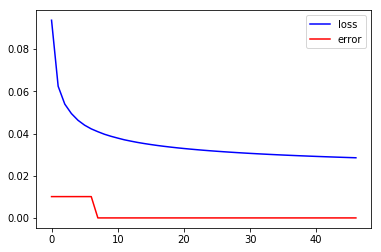

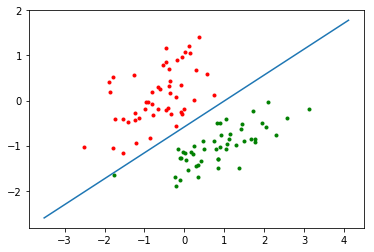

dataset A theta =  [ 3.5100365  -3.45604098  6.01391604]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml
from logisticClassify2 import *
iris = np.genfromtxt("data/iris.txt", delimiter = None)

Y = iris[: , -1]
X = iris[: ,0: 2]
X,Y = ml.shuffleData(X, Y)
X, _ = ml.transforms.rescale(X)
XA, YA = X[Y < 2, :], Y[Y < 2]
XB, YB = X[Y > 0, :], Y[Y > 0]

wts = np.array([0.5,-0.25,1])
learner = logisticClassify2()
learner.theta = wts; 

learner.train(XA,YA,initStep=0.5)
print("dataset A theta = ", learner.theta)

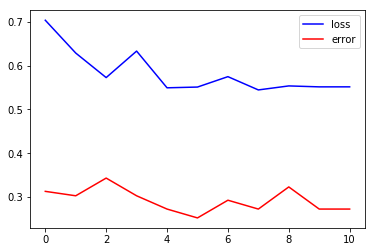

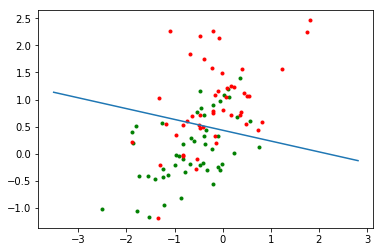

dataset B theta =  [-0.85447936  0.39042084  1.9604496 ]


In [5]:
learner.train(XB,YB,initStep=1)
print("dataset B theta = ",learner.theta)

## Problem 2: Shattering and VC Dimension

(1)$T(a+b{x_1})$ is a line parallel to axis x2

Since there are only one point in the dataset, so (a) can be shattered. There are only two points with different x1 in dataset(b), it can also be shattered. VC dim =2. (c)(d) can't be shattered.

(2)$T((a∗b)x_1+(c/a)x_2)$ is a line with angle crossing the original point

It can shattered dataset(a)(b). It can not shatter point(2,2) from others in dataset (c)(d). VC dim =2.

(3)$T((x_1−a)^{2}+(x_2−b)^{2}+c)$ is a circle, which center and R can be changed.

It can shatter dataset (a)(b)(c). For dataset (d), a cricle can not shatter if the combined lines for each two points with different color is arossed.VC dim =3.

(4)$T(a+bx_1+cx_2)×T(d+bx_1+cx_2)$ is two parallel line, between them is z<0.
It can shattered dataset(a)(b)(c)(d) with two parallel lines in different angle, but it can shatter 5 points if it is divided into class with 3 points and 2 points and the 2 points with one outside the middle area, so its VC dim = 4. 



# Statement of Collaboration

I obey all the rules of UCI academic integrity and finish the project only by my own.
Ziyang Zhang 1/11/2018